# Advanced Experimentation

Using selected questions from the 2012 and 2014 editions of the <a href="http://www.europeansocialsurvey.org/data/round-index.html">European Social Survey</a>, address the following questions. For each question, explain why you chose the approach you did.


<a href='https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/ESS_practice_data/ESSdata_Thinkful.csv'>Here is the data file</a>. And <a href='https://thinkful-ed.github.io/data-201-resources/ESS_practice_data/ESS_codebook.html'>here is the codebook</a>, with information about the variable coding and content.

In this dataset, the same participants answered questions in 2012 and again 2014.

<ol>
<li>Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.</li>
<li>Did people become happier from 2012 to 2014? Compute results for each country in the sample.</li>
    <li>Who reported watching more TV in 2012, men or women?</li>
<li>Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?</li>
<li>Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?</li>
<li>Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?  </li>
</ol>



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
%matplotlib inline

In [2]:
eus = pd.read_csv('https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/ESS_practice_data/ESSdata_Thinkful.csv')

In [3]:
eus.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


***1. Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.***

We'll use visual inspection using histograms and Shapiro-Wilk to test for normality. 

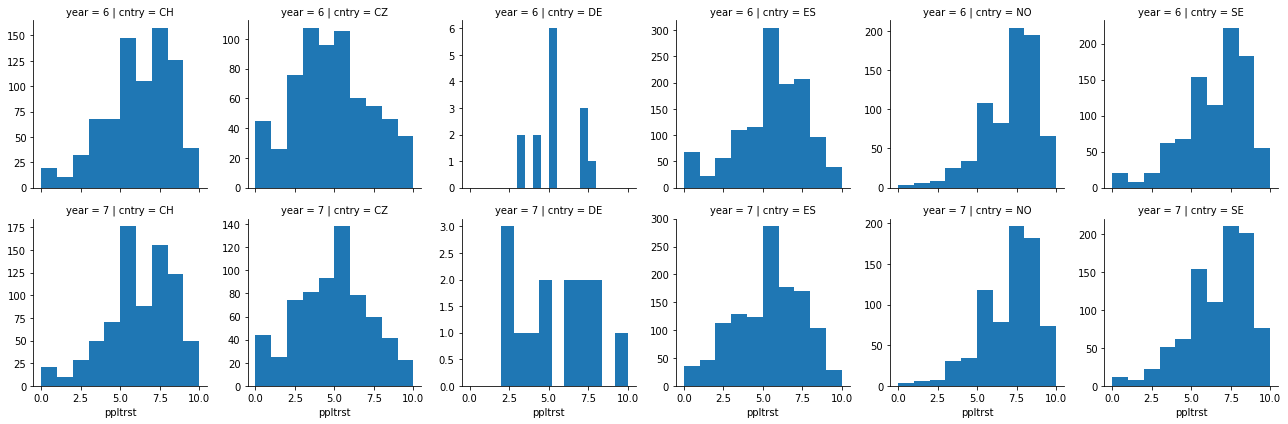

In [4]:
# visual normality inspection
g = sns.FacetGrid(eus, row='year', col='cntry', palette='pastel', dropna=True, sharey=False)
g = g.map(plt.hist, "ppltrst")

In [13]:
# shapiro test for normality
def eus_normaltest(self):
    for cntry in eus['cntry'].unique():
        X12 = eus.loc[(eus['year'] == 6) & (eus['cntry'] == cntry), self].dropna()
        X14 = eus.loc[(eus['year'] == 7) & (eus['cntry'] == cntry), self].dropna()
        print('\nshapiro test {}'.format(cntry))
        print('2012: {}'.format(stats.shapiro(X12)))
        print('2014: {}'.format(stats.shapiro(X14)))

In [14]:
eus_normaltest('ppltrst')


shapiro test CH
2012: (0.9519361853599548, 3.4958809444132896e-15)
2014: (0.9538647532463074, 7.692136586977955e-15)

shapiro test CZ
2012: (0.9675253629684448, 8.030776738054968e-11)
2014: (0.9720321893692017, 7.055935835609262e-10)

shapiro test DE
2012: (0.9013110399246216, 0.1178363636136055)
2014: (0.9425466060638428, 0.4519253373146057)

shapiro test ES
2012: (0.9496549367904663, 5.989953442559737e-20)
2014: (0.9663764834403992, 3.892258005954379e-16)

shapiro test NO
2012: (0.9212563037872314, 4.566682699158387e-19)
2014: (0.9296155571937561, 5.131845063891235e-18)

shapiro test SE
2012: (0.9355123043060303, 2.3822910208982595e-19)
2014: (0.9398238658905029, 1.0416553104982269e-18)


**Interpretation**

The null-hypothesis of sharipo test is that the population is normally distributed. Which means that except for Germany(DE), the distribution is not normal. The histogram also confirms this observation. Therefore we will use the Wilcoxon Signed-Rank test to see if there are differences in trust between 2012 and 2014. We'll use t-test for Germany. 

In [15]:
# use wilcoxon ranked test for non-normal dist. where participants did both versions
for cntry in eus['cntry'].unique():
    X12 = eus.loc[(eus['year'] == 6) & (eus['cntry'] == cntry), 'ppltrst']
    X14 = eus.loc[(eus['year'] == 7) & (eus['cntry'] == cntry), 'ppltrst']
    result = stats.wilcoxon(X12, X14)
    print('\nTrust results for {}'.format(cntry))
    print('Mean 2012: {}'.format(np.mean(X12)))
    print('Mean 2014: {}'.format(np.mean(X14)))
    print(result)
    if cntry == 'DE':
        print(stats.ttest_rel(X12, X14, nan_policy='omit'))


Trust results for CH
Mean 2012: 5.677878395860285
Mean 2014: 5.751617076326003
WilcoxonResult(statistic=106278.5, pvalue=0.4411286510952477)

Trust results for CZ
Mean 2012: 4.362519201228879
Mean 2014: 4.424657534246576
WilcoxonResult(statistic=82837.0, pvalue=0.2931891426327379)

Trust results for DE
Mean 2012: 5.214285714285714
Mean 2014: 5.357142857142857
WilcoxonResult(statistic=44.0, pvalue=0.9157134600899863)
Ttest_relResult(statistic=-0.18399501804849683, pvalue=0.8568563797095805)

Trust results for ES
Mean 2012: 5.114591920857379
Mean 2014: 4.895127993393889
WilcoxonResult(statistic=243475.5, pvalue=0.005570829650439684)

Trust results for NO
Mean 2012: 6.64931506849315
Mean 2014: 6.598630136986301
WilcoxonResult(statistic=85392.0, pvalue=0.6139175669970661)

Trust results for SE
Mean 2012: 6.058498896247241
Mean 2014: 6.257709251101321
WilcoxonResult(statistic=130719.5, pvalue=0.028545290985536906)


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\scipy\stats\morestats.py:2391: RuntimeWarning: invalid value encountered in greater
  r_plus = np.sum((d > 0) * r, axis=0)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\scipy\stats\morestats.py:2392: RuntimeWarning: invalid value encountered in less
  r_minus = np.sum((d < 0) * r, axis=0)


For countries above except Spain and to a little extent Sweden, there is no difference in people's trust between they years 2012 and 2014. 

**2. Did people become happier from 2012 to 2014? Compute results for each country in the sample.** 

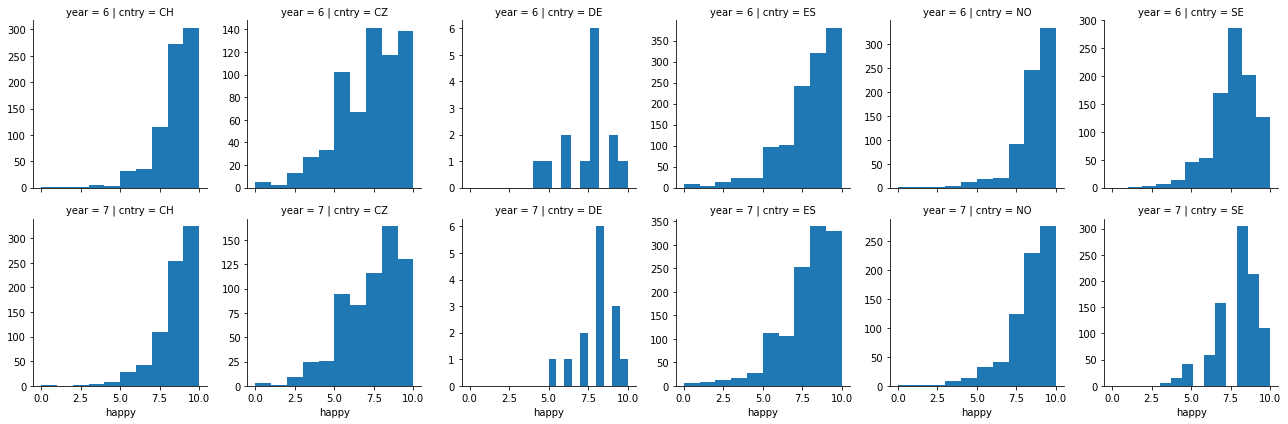

In [16]:
# visual normality inspection
g = sns.FacetGrid(eus, row='year', col='cntry', palette='pastel', dropna=True, sharey=False)
g = g.map(plt.hist, "happy")

In [17]:
# shapiro test for normality
def eus_normaltest(self):
    for cntry in eus['cntry'].unique():
        X12 = eus.loc[(eus['year'] == 6) & (eus['cntry'] == cntry), self].dropna()
        X14 = eus.loc[(eus['year'] == 7) & (eus['cntry'] == cntry), self].dropna()
        print('\nshapiro test {}'.format(cntry))
        print('2012: {}'.format(stats.shapiro(X12)))
        print('2014: {}'.format(stats.shapiro(X14)))

In [18]:
eus_normaltest('happy')


shapiro test CH
2012: (0.8790070414543152, 5.283100089878269e-24)
2014: (0.8895691633224487, 4.494222618578247e-23)

shapiro test CZ
2012: (0.9485082626342773, 3.276684276015164e-14)
2014: (0.9416089653968811, 2.5235815651389716e-15)

shapiro test DE
2012: (0.916941225528717, 0.1986599564552307)
2014: (0.9213663339614868, 0.23006466031074524)

shapiro test ES
2012: (0.90250164270401, 4.254964729854498e-27)
2014: (0.9102423787117004, 3.8794469092978745e-26)

shapiro test NO
2012: (0.8509966731071472, 1.3336539163043988e-25)
2014: (0.8809076547622681, 3.1033939472688407e-23)

shapiro test SE
2012: (0.9038249254226685, 1.9533988305248914e-23)
2014: (0.912081241607666, 1.8494631877095298e-22)


**Interpretation**

The null-hypothesis of sharipo test is that the population is normally distributed. Which means that except for Germany(DE), the distribution is not normal. The histogram also confirms this observation. Therefore we will use the Wilcoxon Signed-Rank test to see if there are differences in happiness between 2012 and 2014. We'll use t-test for Germany. 

In [20]:
# use wilcoxon ranked test for non-normal dist. where participants did both versions
for cntry in eus['cntry'].unique():
    X12 = eus.loc[(eus['year'] == 6) & (eus['cntry'] == cntry), 'happy']
    X14 = eus.loc[(eus['year'] == 7) & (eus['cntry'] == cntry), 'happy']
    result = stats.wilcoxon(X12, X14)
    print('\nHappy results for {}'.format(cntry))
    print('Mean 2012: {}'.format(np.mean(X12)))
    print('Mean 2014: {}'.format(np.mean(X14)))
    print(result)
    if cntry == 'DE':
        print(stats.ttest_rel(X12, X14, nan_policy='omit'))


Happy results for CH
Mean 2012: 8.088311688311688
Mean 2014: 8.116429495472186
WilcoxonResult(statistic=92816.5, pvalue=0.8208688161425343)

Happy results for CZ
Mean 2012: 6.7708978328173375
Mean 2014: 6.914110429447852
WilcoxonResult(statistic=73213.0, pvalue=0.01064243454053068)

Happy results for DE
Mean 2012: 7.428571428571429
Mean 2014: 7.857142857142857
WilcoxonResult(statistic=23.5, pvalue=0.393351316918508)
Ttest_relResult(statistic=-0.8062257748298549, pvalue=0.4346138707734991)

Happy results for ES
Mean 2012: 7.548679867986799
Mean 2014: 7.41996699669967
WilcoxonResult(statistic=231958.5, pvalue=0.04923868084306013)

Happy results for NO
Mean 2012: 8.25171939477304
Mean 2014: 7.9151846785225715
WilcoxonResult(statistic=67571.5, pvalue=2.7264367804254175e-06)

Happy results for SE
Mean 2012: 7.907386990077177
Mean 2014: 7.946961325966851
WilcoxonResult(statistic=125481.0, pvalue=0.5136403441005022)


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\scipy\stats\morestats.py:2391: RuntimeWarning: invalid value encountered in greater
  r_plus = np.sum((d > 0) * r, axis=0)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\scipy\stats\morestats.py:2392: RuntimeWarning: invalid value encountered in less
  r_minus = np.sum((d < 0) * r, axis=0)


For Czech Republic, Norway and Spain, we reject the null hypothesis and conclude that people became less happy in 2014 than in 2012. There is a slight increase in happniness for Germany but the sample size is small and the p-value in just under the borderline making it not conclusive. There is no difference for other countries. 

**3. Who reported watching more TV in 2012, men or women?** 

Here we're comparing men vs women which are independent variables as a result we'll use t-test to check the difference in distribution. 

In [22]:
#Check number of observations 
print(len(eus.loc[(eus['year'] == 6) & (eus['gndr'] == 1), 'tvtot']))
print(len(eus.loc[(eus['year'] == 6) & (eus['gndr'] == 2), 'tvtot']))

2154
2143


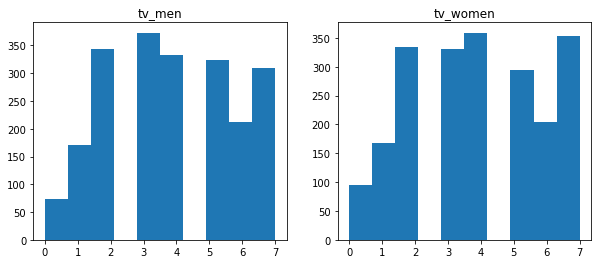

In [28]:
# check distribution visually 
tv_women_2012 = eus.loc[(eus['year'] == 6) & (eus['gndr'] == 2), 'tvtot'].dropna()
tv_men_2012 = eus.loc[(eus['year'] == 6) & (eus['gndr'] == 1), 'tvtot'].dropna().sample(len(tv_women_2012))

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.hist(tv_men_2012.dropna())
plt.title('tv_men')
         
plt.subplot(1,2,2)
plt.hist(tv_women_2012.dropna())
plt.title('tv_women')
plt.show()


In [30]:
#Normality test
print(stats.shapiro(tv_men_2012))
print(stats.shapiro(tv_women_2012))

(0.9432481527328491, 6.385079841015724e-28)
(0.9390434622764587, 8.488309331265169e-29)


We can see from the plot and shapiro test that the distribution for both variables is nor normal. As a result we'll use Mann Whitney U test to check similarity.  

In [31]:
#Similarity test
print(stats.mannwhitneyu(tv_men_2012, tv_women_2012))

MannwhitneyuResult(statistic=2264117.5, pvalue=0.2604010515050652)


With a p value of 0.26, we can reject the null hypothesis and conclude that there is no difference between the amount of time men and women spent watching tv in 2012.  

**4. Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?**

In [32]:
# 1= lives with partner, 2= live alone
live_partner = eus.loc[(eus['partner'] == 1) & (eus['year'] == 6), 'pplfair'].dropna()
live_alone = eus.loc[(eus['partner'] == 2) & (eus['year'] == 6), 'pplfair'].dropna()

print(len(live_partner))
print(len(live_alone))

2663
1608


In [33]:
live_partner = live_partner.sample(len(live_alone))

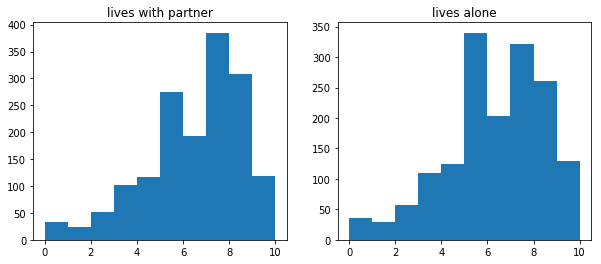

(0.9405364394187927, 6.745437680903944e-25)
(0.9561690092086792, 1.4302870646482291e-21)


In [35]:
# visual normality check

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.hist(live_partner)
plt.title('lives with partner')

plt.subplot(1,2,2)
plt.hist(live_alone)
plt.title('lives alone')
plt.show()

print(stats.shapiro(live_partner))
print(stats.shapiro(live_alone))

Both the shapiro test and the histogram show that the distribution is not normal. Let's use the Wilcoxon Signed-Rank test to check for differences. 

In [36]:
print(stats.wilcoxon(live_partner, live_alone))

WilcoxonResult(statistic=445114.5, pvalue=0.026586999332478423)


There is a significant difference between the two distributions. Let's canculate the median for comparison. 

In [37]:
print('Lives with a partner', np.median(live_partner))
print('Lives alone', np.median(live_alone))

Lives with a partner 7.0
Lives alone 6.0


More peple who live with a partner believe that people are trustworthy than people who live alone.   

**5.Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?**

In [49]:
# check countries in year 2014
country_list = eus.cntry[eus.year==7].unique()
country_list

array(['CH', 'CZ', 'DE', 'ES', 'NO', 'SE'], dtype=object)

In [48]:
# check number of entries 
print(eus.cntry[eus.year==7].value_counts())

ES    1213
SE     908
CH     773
NO     731
CZ     658
DE      14
Name: cntry, dtype: int64


Let's choose Spain, Sweden and Norway. I expect similarity between Sweden and Norway due to geographic and cultural proximity.  

In [50]:
# Chosen country list
country = ['ES', 'NO', 'SE']

In [54]:
#
eus_country = eus[(eus.cntry).isin(country) & (eus.year == 7)]

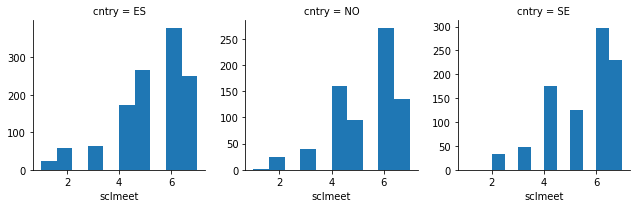

In [55]:
# Visualize distribution 
g = sns.FacetGrid(eus_country,
                  col='cntry',
                  dropna=True,
                  sharey=False)
g.map(plt.hist, 'sclmeet')
plt.show()

In [64]:
# normality test
for cntry in country:
    # calculate for each country in our list
    print(cntry, stats.shapiro(eus_country[eus_country.cntry ==cntry].sclmeet.dropna()))

ES (0.8880351781845093, 9.848293928138278e-29)
NO (0.8881818056106567, 1.422473605641294e-22)
SE (0.8798282146453857, 6.682967662559975e-26)


The histogram and shapiro test indicate that the distribution of data is not normal. Let's use Mann Whitney U test to check for similarity. 

In [69]:
print(stats.kruskal(eus_country[eus_country.cntry == 'ES'].sclmeet.dropna(),
             eus_country[eus_country.cntry == 'NO'].sclmeet.dropna(),
             eus_country[eus_country.cntry == 'SE'].sclmeet.dropna()))

KruskalResult(statistic=6.904038519231737, pvalue=0.03168159837298754)


We can conclude that the distribution of social meetings is different among the countries selected. The t-test for independent variables below shows the magnitude of differences among each country 

In [71]:
print('ES vs NO:', stats.ttest_ind(eus_country[eus_country.cntry == 'ES'].sclmeet.dropna(),
             eus_country[eus_country.cntry == 'NO'].sclmeet.dropna()))
print('ES vs SE:', stats.ttest_ind(eus_country[eus_country.cntry == 'ES'].sclmeet.dropna(),
             eus_country[eus_country.cntry == 'SE'].sclmeet.dropna()))
print('NO vs SE:', stats.ttest_ind(eus_country[eus_country.cntry == 'NO'].sclmeet.dropna(),
             eus_country[eus_country.cntry == 'SE'].sclmeet.dropna()))

ES vs NO: Ttest_indResult(statistic=-0.632916395870007, pvalue=0.5268628350318294)
ES vs SE: Ttest_indResult(statistic=-2.649547268580078, pvalue=0.00811992279651295)
NO vs SE: Ttest_indResult(statistic=-1.8305856428076237, pvalue=0.06734412432597783)


Spain and Norway are not significantly different
Spain and Sweden are significantly different
Norway and Sweden are almost the same as expected 

**6. Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?**

This exercise is similar to the one above. Let's save some time.  